## Project: Predicting Boston Housing Prices

## Aim:
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value.

### About the data:
The dataset for this project originates from the UCI Machine Learning Repository and also in Kaggle.
- The Boston housing data was collected with each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. 

- For the purposes of this project, preprocessing steps have been made to the dataset by removing the non-relevant features.

In [1]:
# Importing libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# for displaying images on the notebook
%matplotlib inline

# Loading the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
# Overview of the data with the features
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Data Exploration

Here to familiarize with the dataset we follow a explorative process to better undestand the data and then note our observations recorded.

- As the main goal of our project is to construct a model which has the capability of predicting the value of houses, we seperate the dataset that we have into features(independent variables) and target variable(dependent variable).
- From the dataset we have we can observe that the independent varibales here are 'RM', 'LSTAT', 'PTRATIO', these are our features. And our target variable here is 'MEDV' which contains the prices of the properties.

- 'RM' feature indicates is the average number of rooms among homes in the neighborhood.

- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).

- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

### Calculate Statistics
Here we calculate some descriptive statistics about the boston housing prices. The numpy pacakage that we have imported above is used for performing these calculations.

We calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'.

In [3]:
# Minimum price of the data
minimum_price = min(data['MEDV'])

# Maximum price of the data
maximum_price = max(data['MEDV'])

# Mean price of the data
mean_price = np.mean(data['MEDV'])

# Median price of the data
median_price = np.median(data['MEDV'])

# Standard deviation of prices of the data
std_price = np.std(data['MEDV'])

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


## To observe the relationships between independent and dependent variables 

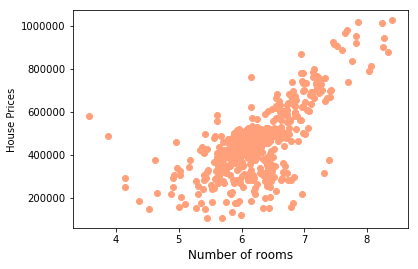

In [4]:
import matplotlib.pyplot as plt
plt.xlabel('Number of rooms', fontsize = 12)
plt.ylabel('House Prices')
plt.scatter(data['RM'],data['MEDV'], c = 'lightsalmon')
plt.show()

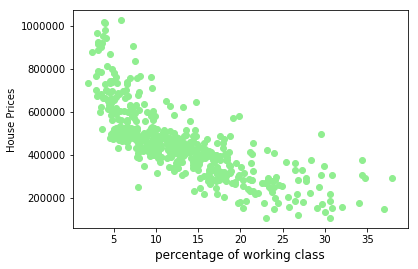

In [5]:
plt.xlabel('percentage of working class', fontsize = 12)
plt.ylabel('House Prices')
plt.scatter(data['LSTAT'],data['MEDV'], c = 'lightgreen')
plt.show()

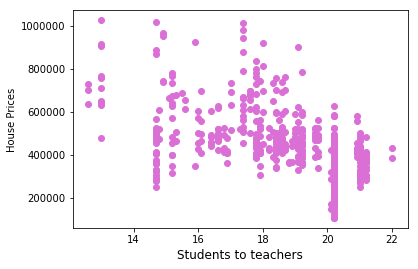

In [6]:
plt.xlabel('Students to teachers', fontsize = 12)
plt.ylabel('House Prices')
plt.scatter(data['PTRATIO'],data['MEDV'], c = 'orchid')
plt.show()

### Shuffle and Split Data
Now we take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [7]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [8]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split
X = features
y = prices
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=14)

# After split
print("Training and testing split was successful.")

Training and testing split was successful.


### Why do we split the dataset into training and test sets?
The splitting of data into test and train sets are essential in testing the efficiency of a model that we are considering. Considering all the data at once and creating a model might result in overfitting the data and the model might fail when put into predicting real world parameters. Using testing and training data would help in generalizing the model in such a way that the model can get accustomed to accomodate different values as well in such a way that the fit is consitent amongst all other data points and is generalized to all the data points. In this way we can be sure that model will fit in a generalized manner to any sort of datapoint that it is put forth to.

----

## Model Performance

Here in this part we take a look at several models' learning and testing performances on various subsets of training data. Additionally, we will investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Here the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

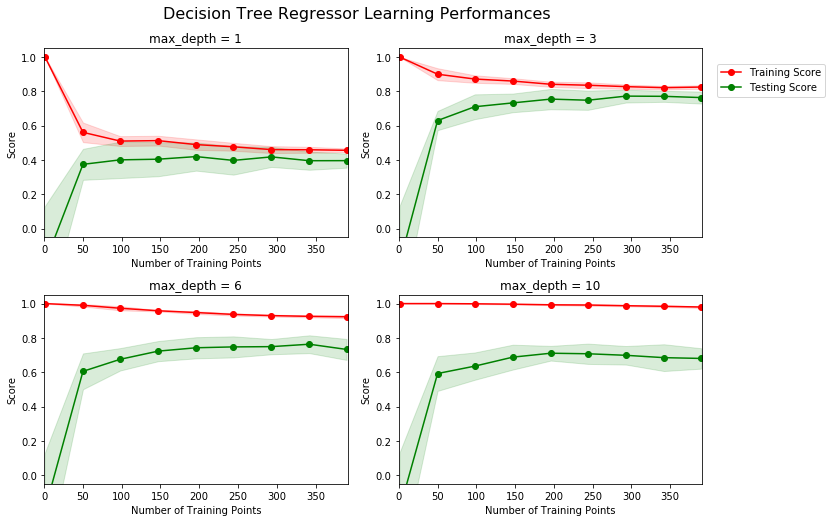

In [9]:
# learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Bias-Variance Tradeoff

We know that high bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). From this we can infer that then the model is trained with a max_depth = 1, the model suffers from High Bias. The score is too low for both the testing and training datasets which is an indication that model is not able to pick up the nuances in the data.

When the model is trained with max_depth = 10 the training data score is extremely high as close to a perfect model but as seen in many cases the test scores seems extremely low (0.4) comparatively. Even taking into consideration of the uncertainity, the difference between the training and test score is huge which indicates High Variance.

-----

## Evaluating Model Performance
In this final section of this project, we will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

** GRID SEARCH **

Grid search technique allows us to define parameters and a way of handling hyper parameters by adding grids to store them which makes searching simpler.
It tries every combination of hyper parameter to come up with the best model. The most efficient model can be selected by using cross validation and F1 score to decide on the same.

### Implementation: Fitting a Model

In this final step we bring everything togther and train a model using the ** decision tree ** algorithm. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

We will use `ShuffleSplit()` for an alternative form of cross-validation. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*.

In [10]:
performance_metric

<function __main__.performance_metric>

In [11]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Created a cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Created a decision tree regressor object
    regressor = RandomForestRegressor(random_state = 0)

    # Created a dictionary for the parameter 'max_depth' with a range from 1 to 10
    ran= range(1,11)
    params = dict(max_depth = ran)

    # Transforming 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Created the grid search cv object --> GridSearchCV()
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)
    # Fitting the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Accuracy of the model

In [12]:
reg = fit_model(X_train, y_train)
p1=reg.predict(X_test)
print(round(r2_score(p1,y_test),2))

0.7


### Making Predictions

Here we have created a model and trained the model with the training data that we have. So now it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Predicting Selling Prices

Let us take the example of a real estate agent in the Boston area looking to use this model to help predicting the prices of homes owned by his clients that they wish to sell. let us assume he has collected the following information from three of his clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

In [13]:
# matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $319,305.00
Predicted selling price for Client 2's home: $243,098.00
Predicted selling price for Client 3's home: $784,105.00


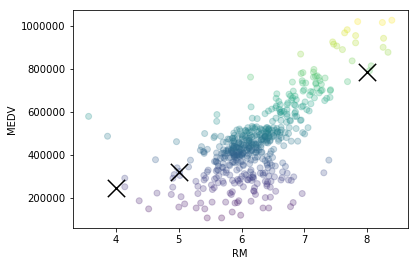

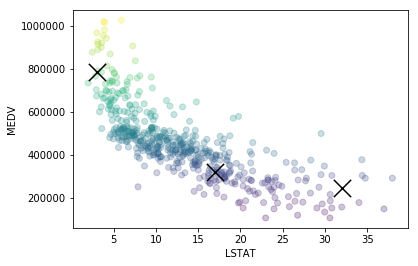

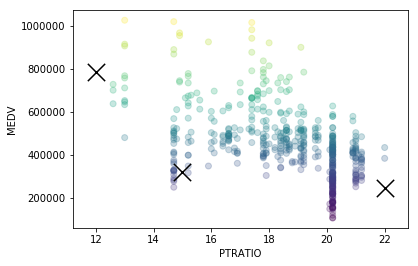

In [14]:
clients = np.transpose(client_data)
pred = reg.predict(client_data)
for i, feat in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.scatter(features[feat], prices, alpha=0.25, c=prices)
    plt.scatter(clients[i], pred, color='black', marker='x', s=300, linewidths=10)
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()

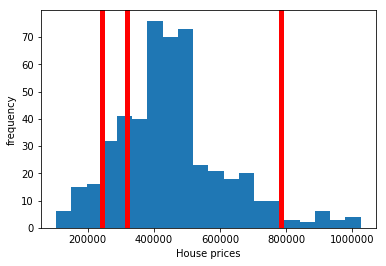

In [15]:
import matplotlib.pyplot as plt
plt.hist(prices, bins = 20)
plt.xlabel('House prices')
plt.ylabel('frequency')
for price in reg.predict(client_data):
    plt.axvline(price, lw = 5, c = 'r')